In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn import datasets

In [16]:
# data = datasets.load_boston() removed from lates version

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #X
target = raw_df.values[1::2, 2] #Y

In [21]:
print(type(data))
print(type(target))
print(data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)


In [29]:
df = pd.DataFrame(data)
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df.columns = features

desc = """
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's
"""

In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# How to split data into training and test 


In [30]:
from sklearn import model_selection

In [35]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target)

In [39]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


# Linear Regression


In [42]:
from sklearn.linear_model import LinearRegression

algo = LinearRegression()

### Training

In [43]:
algo.fit(x_train, y_train)

LinearRegression()

### Predicting

In [44]:
y_preedict = algo.predict(x_test)

### Comparing

In [46]:
import matplotlib.pyplot as plt

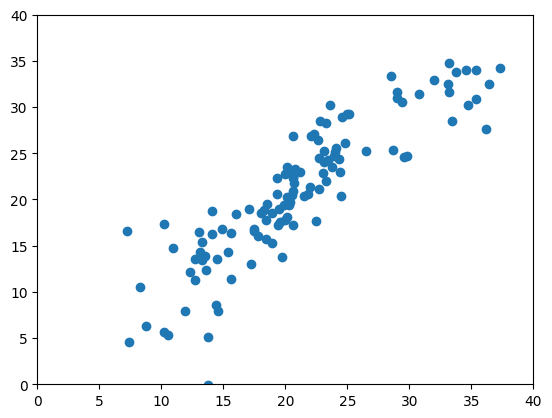

In [47]:
plt.scatter(y_test, y_preedict)
plt.axis([0,40,0,40])
plt.show()

### this should be a straight line of x=y for perfection

# DIABETES


In [2]:
dia = datasets.load_diabetes()

In [18]:

x = dia.data
y = dia.target
features = dia.feature_names
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.DataFrame(x)
df.columns = features
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [29]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [22]:
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x,y)

In [26]:
print(x_train.shape)
print(x_test.shape)

(331, 10)
(111, 10)


In [31]:
dia_algo = LinearRegression()

In [32]:
dia_algo.fit(x_train, y_train)

LinearRegression()

In [33]:
y_predict = dia_algo.predict(x_test)

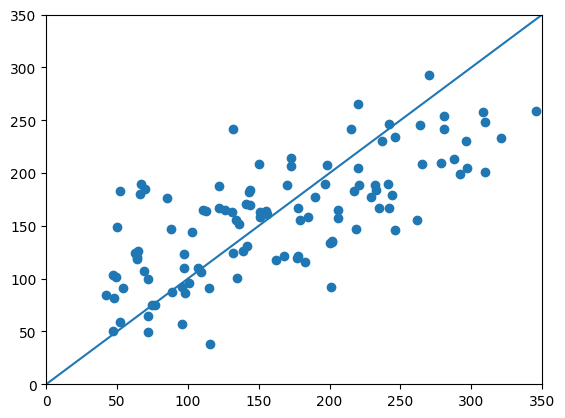

In [38]:
plt.scatter(y_test, y_predict)
plt.axis([0,350,0,350])
plt.plot([0,350], [0,350])
plt.show()